In [1]:
import matplotlib.gridspec as gridspec
import scqubits
import numpy as np
from CoupledQuantumSystems.visualization import *
from CoupledQuantumSystems.systems import *
from tqdm import tqdm
from CoupledQuantumSystems.qobj_manip import *
from CoupledQuantumSystems.drive import *
from  IPython.display import  clear_output

Er loop: 100%|██████████| 10000/10000 [00:00<00:00, 142750.80it/s]


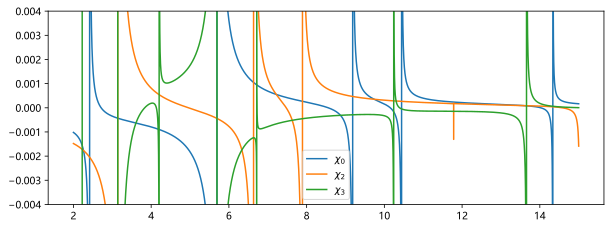

In [2]:
n_evals = 13
qls = [0,2,3]
max_ol = 50
max_ql = 13

fig,ax1 = plt.subplots(figsize=(10, 3.5)) 

EJ_over_EC = 2
EJ_over_EL = 30
qbt1 = scqubits.Fluxonium(EJ = 4,EC = 4/EJ_over_EC,EL = 4/EJ_over_EL, cutoff = 110,flux = 0,truncated_dim=n_evals)
evals1 = qbt1.eigenvals(n_evals)
matrix1 =  qbt1.matrixelement_table(operator = "n_operator",evals_count=n_evals)
Er_list1 = np.linspace(2,15,int(1e4))
for ql  in qls:
    shift_from_qubit_transition = []
    for Er in tqdm(Er_list1, desc = "Er loop"):
        shifts = [get_shift_accurate(matrix1[ql,ql2], evals1[ql2], evals1[ql], Er) for ql2 in range(n_evals)] 
        shift_from_qubit_transition.append(sum(shifts)/100)
    ax1.plot(Er_list1,np.array(shift_from_qubit_transition), label=rf'$\chi_{ql}$')

ax1.set_ylim(-0.004,0.004)
ax1.legend()


In [3]:
fluxonium = scqubits.Fluxonium(EJ = 4,EC = 4/EJ_over_EC,EL = 4/EJ_over_EL, cutoff = 110,flux = 0,truncated_dim=max_ql)

In [4]:
max_tl = 4
transmon = scqubits.Transmon(
    EJ= 34.42551,
    EC=0.2,
    ng=0.0,
    ncut=10,
    truncated_dim = max_tl
    )

system = FluxoniumTransmonSystem(
    fluxonium  = fluxonium,
    transmon = transmon,
    computaional_states = '0,2',
    g_strength = 0.1,
    )
driven_op = qutip.Qobj(system.hilbertspace.op_in_dressed_eigenbasis(transmon.n_operator)[:, :])

e_ops = []
for ql in range(max_ql):
    for tl in range(max_tl):
        e_ops.append(system.truncate_function(qutip.ket2dm(qutip.basis(system.hilbertspace.dimension, system.product_to_dressed[(ql,tl)]))))


# first, square pulse

 Total run time:   2.25s*] Elapsed 2.25s / Remaining 00:00:00:00 [*********66%***        ] Elapsed 1.89s / Remaining 00:00:00:00
 Total run time:   2.35s*] Elapsed 2.35s / Remaining 00:00:00:00
 [*********83%*******    ] Elapsed 2.41s / Remaining 00:00:00:00

Processing states with pad_back_custom: 100%|██████████| 500/500 [00:00<00:00, 8888.84it/s]


 Total run time:   2.84s*] Elapsed 2.84s / Remaining 00:00:00:00


Processing states with pad_back_custom: 100%|██████████| 500/500 [00:00<00:00, 8410.48it/s]


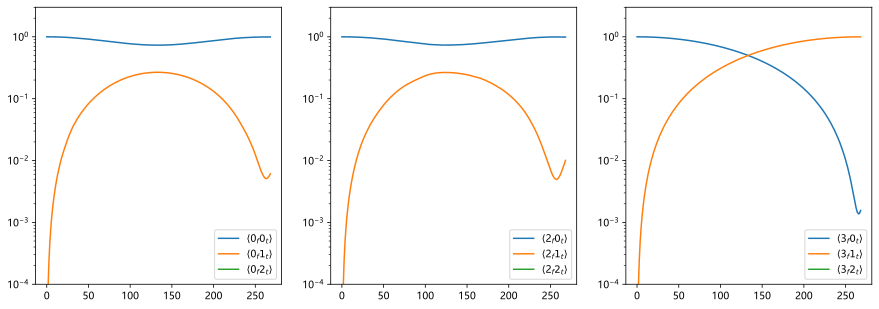

In [15]:
amp = 0.007801508  / (2*np.pi)
t = 268.03
tlist = np.linspace(0,t,500)
results  = system.run_qutip_mesolve_parrallel(
    initial_states = [qutip.basis(system.hilbertspace.dimension, system.product_to_dressed[(ql,0)]) for ql in [0,2,3]],
    tlist = tlist,
    drive_terms = [DriveTerm( 
                            driven_op= driven_op,
                            pulse_shape_func=square_pulse_with_rise_fall,
                            pulse_id = 'sdaas',
                            pulse_shape_args={
                                'w_d': system.evals[system.product_to_dressed[(3,1)]] - system.evals[system.product_to_dressed[(3,0)]] ,
                                'amp': amp,
                                't_square': 1000
                            })],
    # c_ops = c_ops,
    e_ops =  e_ops
)

fig, axes = plt.subplots(1,3,figsize = (15,5))
for i, (result,ql) in enumerate(zip(results,[0,2,3])):
    axes[i].plot(tlist,result.expect[ql*max_tl+0],label= rf"$\langle${ql}$_f0_t\rangle$")
    axes[i].plot(tlist,result.expect[ql*max_tl+1],label= rf"$\langle${ql}$_f1_t\rangle$")
    axes[i].plot(tlist,result.expect[ql*max_tl+2],label= rf"$\langle${ql}$_f2_t\rangle$")
    axes[i].legend()
    axes[i].set_yscale('log')
    axes[i].set_ylim(1e-4,1+2)
    # axes[i].set_xlim(0,102)
plt.show()

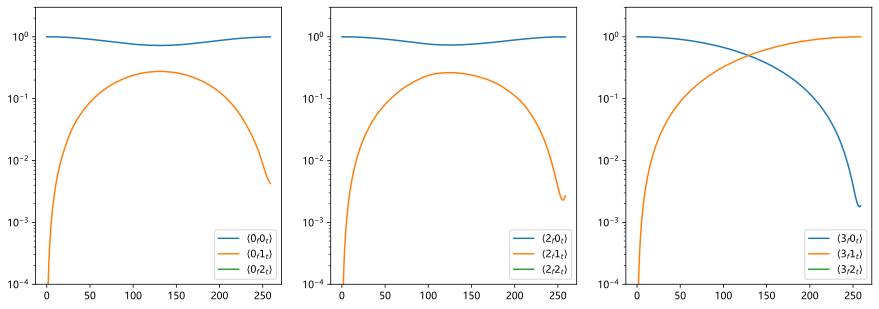

x = [3.43920642e+01 1.28335117e-03 2.58812987e+02], obj  = -1.9861439557305098
 Total run time:   5.41s*] Elapsed 5.41s / Remaining 00:00:00:001[********100%***********] Elapsed 5.41s / Remaining 00:00:00:00 [*********75%*****      ] Elapsed 4.63s / Remaining 00:00:00:01 [*         4%           ] Elapsed 0.21s / Remaining 00:00:00:04 [******   26%           ] Elapsed 1.20s / Remaining 00:00:00:03 [*******  29%           ] Elapsed 1.39s / Remaining 00:00:00:03[*********67%***        ] Elapsed 3.44s / Remaining 00:00:00:01  [*********89%********   ] Elapsed 4.85s / Remaining 00:00:00:00[*********62%**         ] Elapsed 4.79s / Remaining 00:00:00:02
 [*********74%*****      ] Elapsed 5.39s / Remaining 00:00:00:01

Processing states with pad_back_custom: 100%|██████████| 1000/1000 [00:00<00:00, 5396.71it/s]


 Total run time:   6.33s*] Elapsed 6.33s / Remaining 00:00:00:00 [*********95%********** ] Elapsed 6.46s / Remaining 00:00:00:00


Processing states with pad_back_custom:  52%|█████▏    | 522/1000 [00:00<00:00, 5213.23it/s]

 Total run time:   6.75s*] Elapsed 6.75s / Remaining 00:00:00:00


Processing states with pad_back_custom: 100%|██████████| 1000/1000 [00:00<00:00, 4012.89it/s]


KeyboardInterrupt: 

In [18]:
from scipy.optimize import minimize

def objective(x):
    
    EJ = x[0]
    amp = x[1]
    t_duration = x[2]
    tlist = np.linspace(0,t_duration,1000)

    transmon = scqubits.Transmon(
        EJ= EJ,
        EC=0.2,
        ng=0.0,
        ncut=10,
        truncated_dim = max_tl
        )

    system = FluxoniumTransmonSystem(
        fluxonium  = fluxonium,
        transmon = transmon,
        computaional_states = '0,2',
        g_strength = 0.1,
        )
    driven_op = qutip.Qobj(system.hilbertspace.op_in_dressed_eigenbasis(transmon.n_operator)[:, :])

    e_ops = []
    for ql in range(max_ql):
        for tl in range(max_tl):
            e_ops.append(system.truncate_function(qutip.ket2dm(qutip.basis(system.hilbertspace.dimension, system.product_to_dressed[(ql,tl)]))))

    results  = system.run_qutip_mesolve_parrallel(
        initial_states = [qutip.basis(system.hilbertspace.dimension, system.product_to_dressed[(ql,0)]) for ql in [0,2,3]],
        tlist = tlist,
        drive_terms = [DriveTerm( 
                            driven_op= driven_op,
                            pulse_shape_func=square_pulse_with_rise_fall,
                            pulse_id = 'sdaas',
                            pulse_shape_args={
                                'w_d': system.evals[system.product_to_dressed[(3,1)]] - system.evals[system.product_to_dressed[(3,0)]] ,
                                'amp': amp,
                                't_square': 1000
                            })],
        # c_ops = c_ops,
        e_ops =  e_ops
    )
    
    fig, axes = plt.subplots(1,3,figsize = (15,5))
    for i, (result,ql) in enumerate(zip(results,[0,2,3])):
        axes[i].plot(tlist,result.expect[ql*max_tl+0],label= rf"$\langle${ql}$_f0_t\rangle$")
        axes[i].plot(tlist,result.expect[ql*max_tl+1],label= rf"$\langle${ql}$_f1_t\rangle$")
        axes[i].plot(tlist,result.expect[ql*max_tl+2],label= rf"$\langle${ql}$_f2_t\rangle$")
        axes[i].legend()
        axes[i].set_yscale('log')
        axes[i].set_ylim(1e-4,1+2)
    clear_output()
    plt.show()
    obj =  -results[0].expect[0*max_tl+0][-1] ** 2 \
            -results[1].expect[2*max_tl+0][-1] ** 2\
            + results[2].expect[3*max_tl+0][-1] ** 2 / 50
    print(f"x = {x}, obj  = {obj}")
    return obj


initial_guess = [34.4971935, 1.25480134e-3 , 2.62749797e2]

 
result = minimize(objective, initial_guess, method='Nelder-Mead')

objective(initial_guess)

In [24]:
x = [3.43920642e+01, 1.28335117e-03 , 2.58812987e+02]#, obj  = -1.9861439557305098

EJ = x[0]
amp = x[1]
t_duration = x[2]
tlist = np.linspace(0,t_duration,1000)

transmon = scqubits.Transmon(
    EJ= EJ,
    EC=0.2,
    ng=0.0,
    ncut=10,
    truncated_dim = max_tl
    )

system = FluxoniumTransmonSystem(
    fluxonium  = fluxonium,
    transmon = transmon,
    computaional_states = '0,2',
    g_strength = 0.1,
    )
driven_op = qutip.Qobj(system.hilbertspace.op_in_dressed_eigenbasis(transmon.n_operator)[:, :])

e_ops = []
for ql in range(max_ql):
    for tl in range(max_tl):
        e_ops.append(system.truncate_function(qutip.ket2dm(qutip.basis(system.hilbertspace.dimension, system.product_to_dressed[(ql,tl)]))))

results  = system.run_qutip_mesolve_parrallel(
    initial_states = [qutip.basis(system.hilbertspace.dimension, system.product_to_dressed[(ql,0)]) for ql in [0,2,3,1]],
    tlist = tlist,
    drive_terms = [DriveTerm( 
                        driven_op= driven_op,
                        pulse_shape_func=square_pulse_with_rise_fall,
                        pulse_id = 'sdaas',
                        pulse_shape_args={
                            'w_d': system.evals[system.product_to_dressed[(3,1)]] - system.evals[system.product_to_dressed[(3,0)]] ,
                            'amp': amp,
                            't_square': 1000
                        })],
    # c_ops = c_ops,
    e_ops =  e_ops
)


 Total run time:   2.37s*] Elapsed 2.37s / Remaining 00:00:00:00 [*********90%*********  ] Elapsed 2.26s / Remaining 00:00:00:00
 [*********95%********** ] Elapsed 2.39s / Remaining 00:00:00:00

Processing states with pad_back_custom:   0%|          | 0/1000 [00:00<?, ?it/s]

 Total run time:   2.45s*] Elapsed 2.45s / Remaining 00:00:00:00 [*********99%***********] Elapsed 2.43s / Remaining 00:00:00:00
 Total run time:   2.52s*] Elapsed 2.52s / Remaining 00:00:00:00
 [*********87%********   ] Elapsed 2.60s / Remaining 00:00:00:00

Processing states with pad_back_custom: 100%|██████████| 1000/1000 [00:00<00:00, 8166.77it/s]


 Total run time:   2.95s*] Elapsed 2.95s / Remaining 00:00:00:00


Processing states with pad_back_custom: 100%|██████████| 1000/1000 [00:00<00:00, 8621.23it/s]


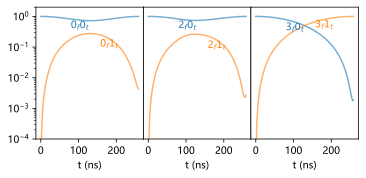

In [45]:
fig = plt.figure(figsize=(5, 2.3)) 
bottom = 0.15
top = 0.95
left = 0.15
l = 0.3

gs0 = fig.add_gridspec(nrows=1, ncols=1,left=left, right=left+l,
                       bottom=bottom,top = top)
gs1 = fig.add_gridspec(nrows=1, ncols=1,left=left+l, right=left+l*2,
                       bottom=bottom,top = top)
gs2 = fig.add_gridspec(nrows=1, ncols=1,left=left+l*2, right=left+l*3,
                       bottom=bottom,top = top)

axes = [fig.add_subplot(gs0[0]),
        fig.add_subplot(gs1[0]),
        fig.add_subplot(gs2[0])]

alpha=0.6
for i, (result,ql) in enumerate(zip(results,[0,2,3])):
    line, =axes[i].plot(tlist,result.expect[ql*max_tl+0],label= rf"$\langle${ql}$_f0_t\rangle$",alpha=alpha)
    axes[i].text(tlist[400],result.expect[ql*max_tl+0][400],s= rf"{ql}$_f0_t$",va='top',ha='center',color=line.get_color())

    line, =axes[i].plot(tlist,result.expect[ql*max_tl+1],label= rf"$\langle${ql}$_f1_t\rangle$",alpha=alpha)
    axes[i].text(tlist[-300],result.expect[ql*max_tl+1][-300],s= rf"{ql}$_f1_t$",va='top',ha='center',color=line.get_color())

    axes[i].set_yscale('log')
    axes[i].set_ylim(1e-4,2)

for i in [0,1,2]:
    axes[i].set_xlabel(f"t (ns)")

for i in [1,2]:
    axes[i].yaxis.set_visible(False)


plt.show()
fig.savefig('detect3.pdf')